In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [2]:
S= "MMM"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("modeldata//"+S+".csv")

In [3]:
df= pd.read_csv("modeldata//"+S+".csv",index_col="Date",parse_dates=True)
df=df[1:len(df)]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-08,65.655665,66.267836,65.464361,65.701576,5515100
2010-11-09,66.061214,66.068862,65.005210,65.273041,4920500
2010-11-10,65.273068,66.183673,65.265415,66.000023,3999000
2010-11-11,65.594423,66.237203,65.211815,66.191292,5850800
2010-11-12,65.824007,66.704008,65.525572,65.992355,4123700


In [4]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-11-08 to 2020-11-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


<AxesSubplot:xlabel='Date'>

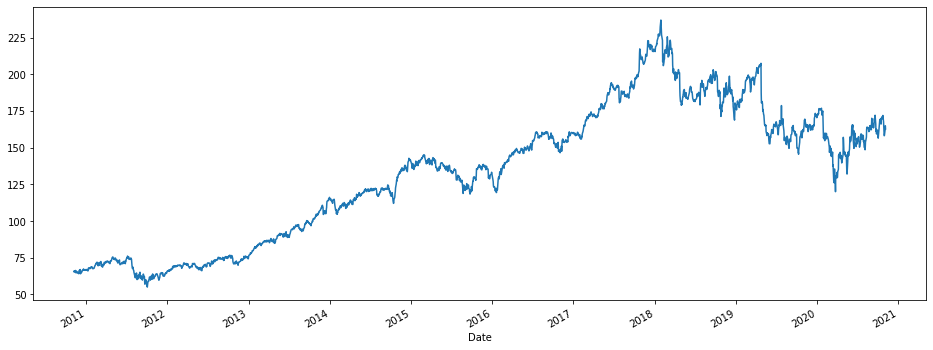

In [6]:
df['Open'].plot(figsize=(16,6))

In [7]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1952, 60, 1)

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0194
Epoch 2/100
1952/1952 [==============================] - 5s 3ms/step - loss: 0.0035
Epoch 3/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0030
Epoch 4/100
1952/1952 [==============================] - 5s 3ms/step - loss: 0.0029
Epoch 5/100
1952/1952 [==============================] - 5s 3ms/step - loss: 0.0032
Epoch 6/100
1952/1952 [==============================] - 5s 3ms/step - loss: 0.0022A: 1
Epoch 7/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0025
Epoch 8/100
1952/1952 [==============================] - ETA: 0s - loss: 0.002 - 6s 3ms/step - loss: 0.0026
Epoch 9/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 10/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0019
Epoch 11/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 12/100
1952/1952 [======================

# Testing

In [16]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
X_test

array([[[0.69153251],
        [0.69035106],
        [0.71048779],
        ...,
        [0.72273225],
        [0.725732  ],
        [0.7396447 ]],

       [[0.69035106],
        [0.71048779],
        [0.73005922],
        ...,
        [0.725732  ],
        [0.7396447 ],
        [0.72681819]],

       [[0.71048779],
        [0.73005922],
        [0.74547002],
        ...,
        [0.7396447 ],
        [0.72681819],
        [0.73566229]],

       ...,

       [[0.54740177],
        [0.561349  ],
        [0.59174972],
        ...,
        [0.57613868],
        [0.56679252],
        [0.56800204]],

       [[0.561349  ],
        [0.59174972],
        [0.59648961],
        ...,
        [0.56679252],
        [0.56800204],
        [0.58922335]],

       [[0.59174972],
        [0.59648961],
        [0.59932267],
        ...,
        [0.56800204],
        [0.58922335],
        [0.60390234]]])

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
X_test

array([[[0.69153251],
        [0.69035106],
        [0.71048779],
        ...,
        [0.72273225],
        [0.725732  ],
        [0.7396447 ]],

       [[0.69035106],
        [0.71048779],
        [0.73005922],
        ...,
        [0.725732  ],
        [0.7396447 ],
        [0.72681819]],

       [[0.71048779],
        [0.73005922],
        [0.74547002],
        ...,
        [0.7396447 ],
        [0.72681819],
        [0.73566229]],

       ...,

       [[0.54740177],
        [0.561349  ],
        [0.59174972],
        ...,
        [0.57613868],
        [0.56679252],
        [0.56800204]],

       [[0.561349  ],
        [0.59174972],
        [0.59648961],
        ...,
        [0.56679252],
        [0.56800204],
        [0.58922335]],

       [[0.59174972],
        [0.59648961],
        [0.59932267],
        ...,
        [0.56800204],
        [0.58922335],
        [0.60390234]]])

In [20]:
predicted_stock_price = regressor.predict(X_test)

In [21]:
predicted_stock_price

array([[0.7198966 ],
       [0.726491  ],
       [0.73044693],
       [0.7326275 ],
       [0.7334462 ],
       [0.73188186],
       [0.7305799 ],
       [0.73232067],
       [0.7402956 ],
       [0.7522444 ],
       [0.76323175],
       [0.77146184],
       [0.776969  ],
       [0.7790343 ],
       [0.7781941 ],
       [0.77870905],
       [0.78126603],
       [0.78382456],
       [0.78497374],
       [0.7847041 ],
       [0.7840345 ],
       [0.7804371 ],
       [0.77462834],
       [0.76709694],
       [0.75659144],
       [0.7493106 ],
       [0.7526276 ],
       [0.762815  ],
       [0.7734521 ],
       [0.78188807],
       [0.7864918 ],
       [0.7879604 ],
       [0.7872367 ],
       [0.7834414 ],
       [0.77987623],
       [0.7735854 ],
       [0.76779264],
       [0.76671094],
       [0.77043426],
       [0.7774792 ],
       [0.7851371 ],
       [0.7930649 ],
       [0.7999525 ],
       [0.804813  ],
       [0.8095111 ],
       [0.81228364],
       [0.8126185 ],
       [0.809

In [22]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(444, 1)

In [23]:
y_test

array([[0.72681819],
       [0.73566229],
       [0.73824828],
       [0.73721392],
       [0.7279043 ],
       [0.73674824],
       [0.74678197],
       [0.76860769],
       [0.77340897],
       [0.77273199],
       [0.78028313],
       [0.78559503],
       [0.78158518],
       [0.77955403],
       [0.79361483],
       [0.7941878 ],
       [0.78908424],
       [0.78622   ],
       [0.78497009],
       [0.78590761],
       [0.76814908],
       [0.76372261],
       [0.75242184],
       [0.73065346],
       [0.74888051],
       [0.77991854],
       [0.77465877],
       [0.77398175],
       [0.78283496],
       [0.78304327],
       [0.78648033],
       [0.78595968],
       [0.77450267],
       [0.78226207],
       [0.75710872],
       [0.76512862],
       [0.77762718],
       [0.78075187],
       [0.78746983],
       [0.79059439],
       [0.80283267],
       [0.80653005],
       [0.80939436],
       [0.82178885],
       [0.81569579],
       [0.81418552],
       [0.8037701 ],
       [0.800

In [24]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [25]:
predicted_stock_price

array([[185.9585 ],
       [187.15797],
       [187.87753],
       [188.27417],
       [188.42307],
       [188.13853],
       [187.9017 ],
       [188.21835],
       [189.66891],
       [191.84232],
       [193.84085],
       [195.33784],
       [196.33954],
       [196.71521],
       [196.56238],
       [196.65605],
       [197.12114],
       [197.58653],
       [197.79555],
       [197.7465 ],
       [197.62471],
       [196.97037],
       [195.91379],
       [194.54388],
       [192.63303],
       [191.3087 ],
       [191.91203],
       [193.76505],
       [195.69984],
       [197.23428],
       [198.07167],
       [198.3388 ],
       [198.20717],
       [197.51683],
       [196.86836],
       [195.72409],
       [194.67043],
       [194.47368],
       [195.15092],
       [196.43234],
       [197.82526],
       [199.26726],
       [200.52008],
       [201.40417],
       [202.25871],
       [202.76302],
       [202.82393],
       [202.25562],
       [201.31458],
       [201.06155],


In [26]:
actual_stock_price.shape

(444, 1)

In [27]:
predicted_stock_price.shape

(444, 1)

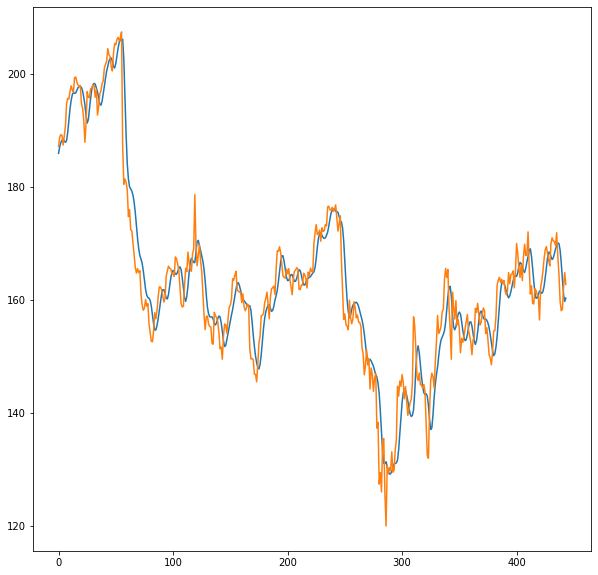

In [28]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [29]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [30]:
predicted_stock_price= predicted_stock_price[-433:]
df=df[-433:]
df['Open2']= predicted_stock_price


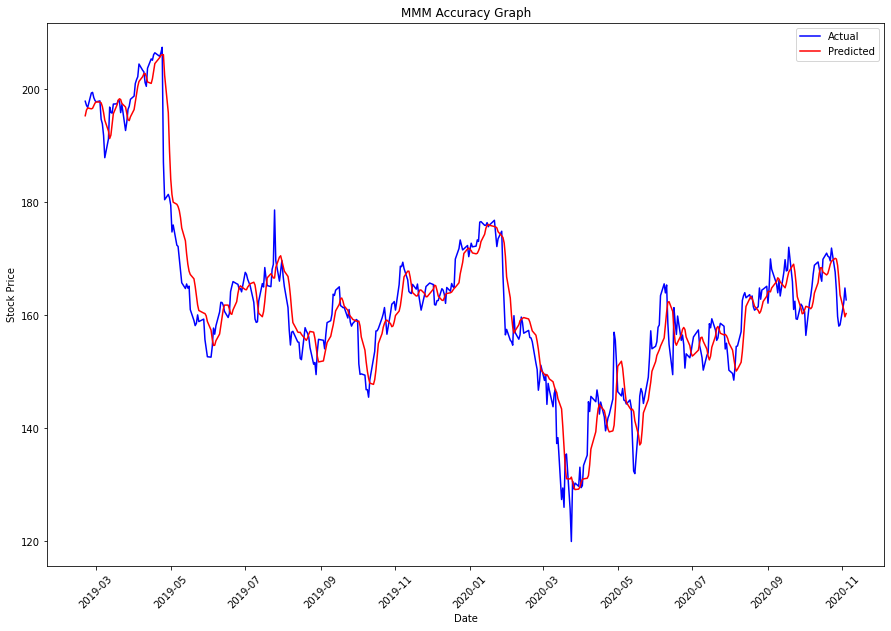

In [31]:
plt.figure(figsize=(15,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Stock Price', fontsize=20)
plt.xticks(rotation=45)
plt.legend(['Actual','Predicted'], fontsize=20)
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=14)
plt.savefig("modeldata//"+S+'accuracy_graph.png')

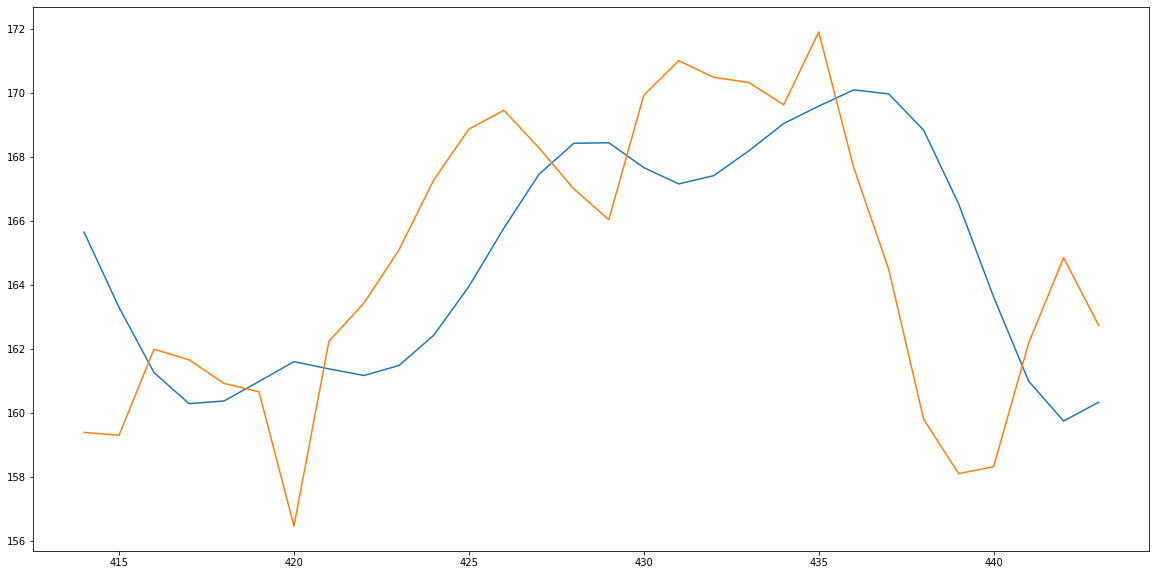

In [32]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [33]:
import pickle
Pkl_Filename = "modeldata//"+S+".pkl"  
sc_file= "modeldata//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)